In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [13]:
# Import the dataset
white_wine_data=pd.read_csv('wine+quality/winequality-white.csv',sep=';')
red_wine_data=pd.read_csv('wine+quality/winequality-red.csv',sep=';')

print(white_wine_data.shape)
print(red_wine_data.shape)

(4898, 12)
(1599, 12)


In [14]:
# Let's see the variables of our dataset
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
# Check any missing values
white_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<Axes: >

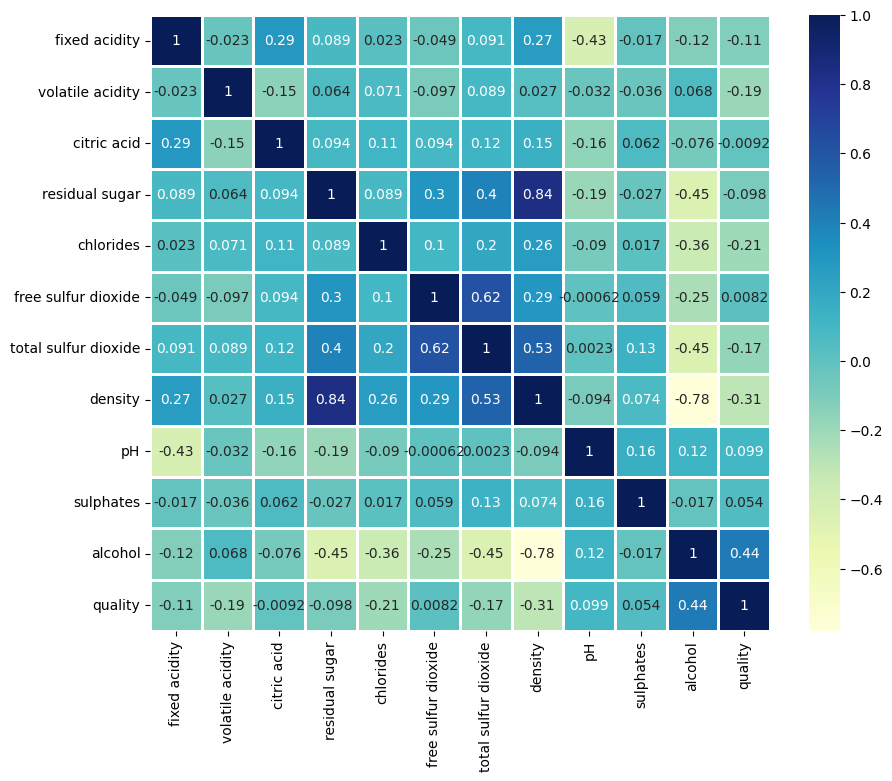

In [16]:
# Let's check a correlation matrix
corr_matrix=white_wine_data.corr()
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix,cmap="YlGnBu",annot=True,linewidth=2,ax=ax)

**What are the most linked variables to the quality?**  
- Alcohol: 0.44  
- Density: 0.31  
- Chlorides: 0.21  
- Total sulfure dioxide: 0.17

In [17]:
white_wine_data.columns
important_variables=['alcohol','density','chlorides','total sulfur dioxide']

Text(0.5, 1.0, 'Alcohol vs Quality')

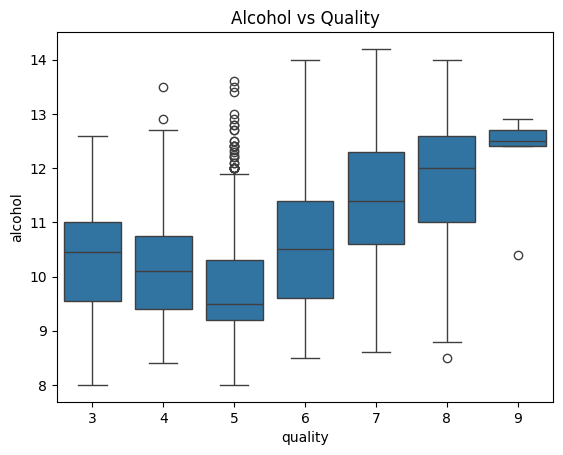

In [18]:
# We are going to check the alcohol vs the quality of the wine
sns.boxplot(x='quality', y='alcohol', data=white_wine_data)
plt.title('Alcohol vs Quality')

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X=white_wine_data.drop('quality',axis=1)
Y=white_wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state=20)

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a KNN model
knn_model = KNeighborsClassifier()

# Set up GridSearchCV
random_search_knn = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid_knn, cv=3, verbose=10, scoring='accuracy')

# Fit the grid search to the data
random_search_knn.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params_knn = random_search_knn.best_params_
best_knn = random_search_knn.best_estimator_

# Make predictions on the test set
y_pred_knn = best_knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START n_neighbors=3, p=1, weights=distance.......................
[CV 1/3; 1/10] END n_neighbors=3, p=1, weights=distance;, score=0.510 total time=   0.0s
[CV 2/3; 1/10] START n_neighbors=3, p=1, weights=distance.......................
[CV 2/3; 1/10] END n_neighbors=3, p=1, weights=distance;, score=0.522 total time=   0.0s
[CV 3/3; 1/10] START n_neighbors=3, p=1, weights=distance.......................
[CV 3/3; 1/10] END n_neighbors=3, p=1, weights=distance;, score=0.524 total time=   0.0s
[CV 1/3; 2/10] START n_neighbors=5, p=2, weights=distance.......................
[CV 1/3; 2/10] END n_neighbors=5, p=2, weights=distance;, score=0.521 total time=   0.0s
[CV 2/3; 2/10] START n_neighbors=5, p=2, weights=distance.......................
[CV 2/3; 2/10] END n_neighbors=5, p=2, weights=distance;, score=0.533 total time=   0.0s
[CV 3/3; 2/10] START n_neighbors=5, p=2, weights=distance.......................
[CV 3/3;

c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[CV 3/3; 3/10] END n_neighbors=7, p=1, weights=distance;, score=0.534 total time=   0.0s
[CV 1/3; 4/10] START n_neighbors=11, p=1, weights=distance......................
[CV 1/3; 4/10] END n_neighbors=11, p=1, weights=distance;, score=0.535 total time=   0.0s
[CV 2/3; 4/10] START n_neighbors=11, p=1, weights=distance......................
[CV 2/3; 4/10] END n_neighbors=11, p=1, weights=distance;, score=0.561 total time=   0.0s
[CV 3/3; 4/10] START n_neighbors=11, p=1, weights=distance......................
[CV 3/3; 4/10] END n_neighbors=11, p=1, weights=distance;, score=0.545 total time=   0.0s
[CV 1/3; 5/10] START n_neighbors=7, p=2, weights=uniform........................
[CV 1/3; 5/10] END n_neighbors=7, p=2, weights=uniform;, score=0.438 total time=   0.0s
[CV 2/3; 5/10] START n_neighbors=7, p=2, weights=uniform........................
[CV 2/3; 5/10] END n_neighbors=7, p=2, weights=uniform;, score=0.462 total time=   0.0s
[CV 3/3; 5/10] START n_neighbors=7, p=2, weights=uniform....

Linear Regression

In [20]:
# We are going to scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf

(0.39854687074829936, 0.5159738788186709)